# Task 2 - Text Classification using NLP

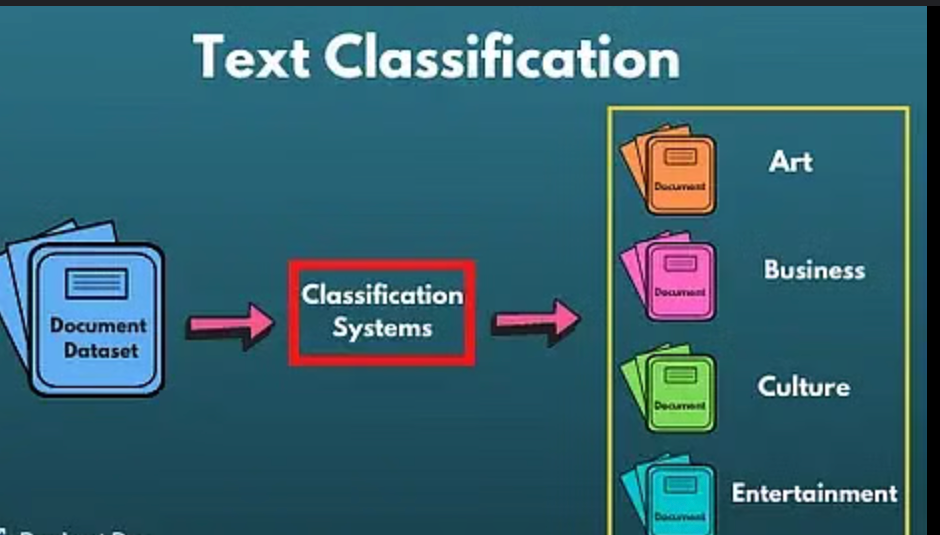

# Objective of project

**The main objective of this project is to build a Text classification model that can automatically predict the automatically predict the catagory of given sentence .The model should classify input text into one of the following 10 catagories such as Education,Ecommerce,Technology,Healthcare,Entertainment,Finance,News,Travel,Sports and other.**

# **Problem Statments:**

**Since we are provided with unlabled dataset cointaining noisy and diverse sentences. These sentence may include emojis,URL,mixed casting,informal language or slang.**
**My task is complely to understand a dataset and Clean the text and remove noise,Label the data into the appropriate categories using rule-based logic,Preprocess the text for modeling (e.g., vectorization),Train and evaluate a classification model,Save the model and vectorizer last but not the least to demonstrate 10 test predictions and accuracy metrics.**

# Step 1 : Loading the data using pandas library

In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/dataset.csv")
data.head(5)

,text
0,Turn on the profile picture guard to make your...
1,►►►hier klicken: http://bit.ly/freiheitsdressu...
2,"Weekend deal alert! Outdo Santa, today only, w..."
3,THIS TEENAGE GIRL SHARES THE BIGGEST SECRET OF...
4,Easy & convenient access to professional guida...


# checking missing value and droping it

In [ ]:
# checking missing value
missing_values = data.isnull().sum()
missing_values

,0
text,9493


In [ ]:
# removing missing value
data = data.dropna()
data

,text
0,Turn on the profile picture guard to make your...
1,►►►hier klicken: http://bit.ly/freiheitsdressu...
2,"Weekend deal alert! Outdo Santa, today only, w..."
3,THIS TEENAGE GIRL SHARES THE BIGGEST SECRET OF...
4,Easy & convenient access to professional guida...
...,...
99995,What are you doing to keep in shape this winte...
99996,Nature''''s Hidden Gems: Top Natural Antibioti...
99997,"After over a year of playing shows, we are ext..."
99998,"Tried, tested, and trusted by the world''''s b..."


In [ ]:
# rechecking once
missing_values = data.isnull().sum()
missing_values

,0
text,0


# step 2: cleaning the text

**In this step i  follow a series of step that help me to get a clean text started with  creating  function which will help me to clean my text handling URLs,lowercase,emojis and symbol, extra whitespace and many more.**

In [ ]:
def clean_text(text):
  #step1: convert to lowercase for uniformity
  text= text.lower()
  # step2: remove link pattern such as www
  if "http" in text or "www" in text or "bit.ly" in text:
    text = text.split("http")[0] # here trying to remove everything after http
  # step 3: here tring to remove emoji and symbol just trying to keep letter n num
  text = ''.join(char for char in text if char.isalnum() or char.isspace())
  # step 4: remove extra spaces
  text = ' '.join(text.split())
  return text



**applying this custom function or helper fun to our dataset**

In [ ]:
# appying the clean fun to the column that we have i.e text
data['clean_text']=data['text'].astype(str).apply(clean_text)

In [ ]:
# lets see the result after changes or fun apply
data[['text','clean_text']].head(5)

,text,clean_text
0,Turn on the profile picture guard to make your...,turn on the profile picture guard to make your...
1,►►►hier klicken: http://bit.ly/freiheitsdressu...,hier klicken
2,"Weekend deal alert! Outdo Santa, today only, w...",weekend deal alert outdo santa today only with...
3,THIS TEENAGE GIRL SHARES THE BIGGEST SECRET OF...,this teenage girl shares the biggest secret of...
4,Easy & convenient access to professional guida...,easy convenient access to professional guidanc...


**Since we have sucessfully handle lowecase ,url.emojis punctuation extra white space within few text preprocesing step**

In [ ]:
data.shape

(90507, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90507 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        90507 non-null  object
 1   clean_text  90507 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB


#  Step 3: creating a label function/helper fun  based on keywords as per question such as Ecommerce ,Eduction and many more

In [ ]:
def label_category(text):
  text = text.lower()
  if any(word in text for word in['buy','deal','offer','sales']):
    return 'Ecommerce'
  elif any(word in text for word in['learn','study','Education','course','class']):
    return 'Education'
  elif any(word in text for word in['Technology','tech','ai','data','machine learning']):
    return 'Technology'
  elif any(word in text for word in['health','doctor','clinic','hospital']):
    return 'Healthcare'
  elif any(word in text for word in['movies','music','song','entertainment','tv']):
    return 'Entertainment'
  elif any(word in text for word in['finance','loan','bank','money']):
    return 'Finance'
  elif any(word in text for word in['news','breaking','headline']):
    return 'News'
  elif any(word in text for word in['travel','flight','hotels','trip']):
    return 'Travel'
  elif any(word in text for word in['match','cricket','football','sports']):
    return 'Sports'
  else:
    return 'Other'




**Applying our custom or label fun to our clean text**

In [ ]:
data['category'] = data['clean_text'].apply(label_category)

**Checking the output or changes after applying the label function**

In [ ]:
data[['clean_text','category']].head(10)

,clean_text,category
0,turn on the profile picture guard to make your...,Other
1,hier klicken,Other
2,weekend deal alert outdo santa today only with...,Ecommerce
3,this teenage girl shares the biggest secret of...,Other
4,easy convenient access to professional guidanc...,Healthcare
5,detroit wallpaper co finds design inspiration ...,Other
6,your favorite cozy fall drink meets your favor...,Other
7,on 6 7 december affiliate world is taking over...,Other
8,november 29 11 am make room in your wardrobe o...,Technology
9,no compromises no annual contracts only from a...,Ecommerce


**as shown above  we have create the catagory label sucessfully**

# checking class weight for each catagory

category
Other            53294
Technology       18368
Ecommerce         7599
Education         4742
Entertainment     2343
Healthcare        1145
Travel            1032
Finance            999
Sports             582
News               403
Name: count, dtype: int64


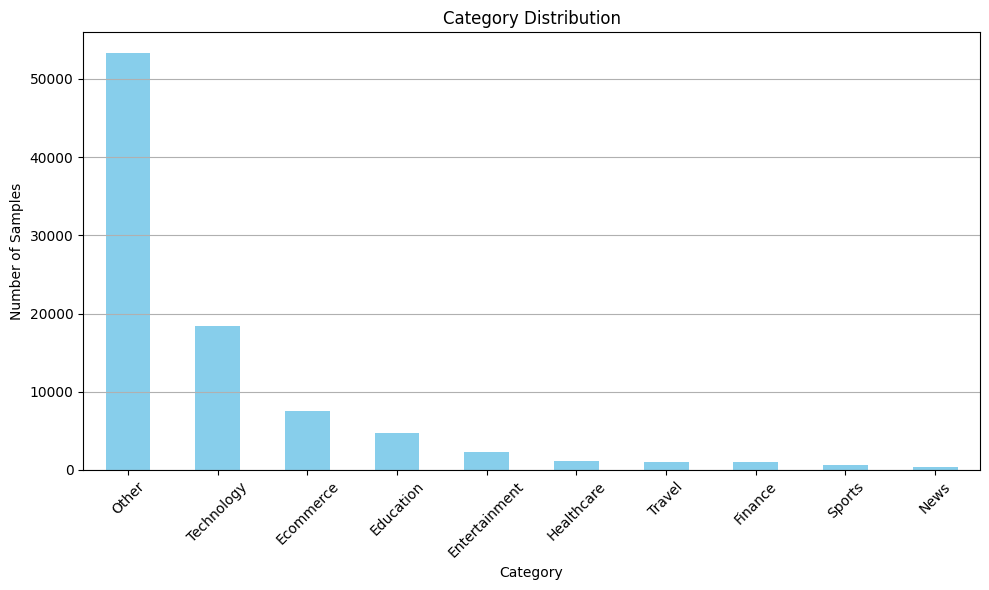

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Check value counts for each class
category_counts = data['category'].value_counts()
print(category_counts)

# Step 2: Plot bar chart
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title("Category Distribution")
plt.xlabel("Category")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Since our class is imbalance other class i.e majority class dominates minority class such as News, sports ,finance and soon so we need to handle it

#TF-IDF Vectorization

#**Importing all the required library**

In [ ]:
# Data handling
import pandas as pd
import numpy as np
# Model selection & validation
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
# Text vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
# Evaluation metrics
from sklearn.metrics import accuracy_score, f1_score, classification_report
# Handling class imbalance
from imblearn.over_sampling import SMOTE
# Saving model and vectorizer
import joblib


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE

# Step 1: Prepare features and labels
X = data['clean_text']
y = data['category']

# Step 2: TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=10000)
X_vec = vectorizer.fit_transform(X)

# Step 3: Stratified Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_vec, y, test_size=0.2, stratify=y, random_state=42
)

# Step 4: Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)


# trying with different model

# Logistic regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE

# Step 1: Prepare features and labels
X = data['clean_text']
y = data['category']

# Step 2: TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=10000)
X_vec = vectorizer.fit_transform(X)

# Step 3: Stratified Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_vec, y, test_size=0.2, stratify=y, random_state=42
)

# Step 4: Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_sm, y_train_sm)

y_pred_logreg = logreg.predict(X_test)

print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_logreg):.4f}")
print(f"Logistic Regression F1 Score: {f1_score(y_test, y_pred_logreg, average='weighted'):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))


Logistic Regression Accuracy: 0.8223
Logistic Regression F1 Score: 0.8309
Classification Report:
                precision    recall  f1-score   support

    Ecommerce       0.94      0.91      0.92      1520
    Education       0.93      0.90      0.92       948
Entertainment       0.35      0.79      0.49       469
      Finance       0.69      0.82      0.75       200
   Healthcare       0.55      0.82      0.66       229
         News       0.62      0.73      0.67        81
        Other       0.90      0.83      0.87     10659
       Sports       0.55      0.78      0.64       116
   Technology       0.77      0.74      0.75      3674
       Travel       0.40      0.79      0.53       206

     accuracy                           0.82     18102
    macro avg       0.67      0.81      0.72     18102
 weighted avg       0.85      0.82      0.83     18102



#  2.Training  and Evaluate SVM (LinearSVC)

In [ ]:
from sklearn.svm import LinearSVC

# Initialize model
svm_model = LinearSVC()

# Fit the model
svm_model.fit(X_train_sm, y_train_sm)

# Predict
y_pred_svm = svm_model.predict(X_test)

# Evaluate
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"SVM F1 Score: {f1_score(y_test, y_pred_svm, average='weighted'):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.8365
SVM F1 Score: 0.8457
Classification Report:
                precision    recall  f1-score   support

    Ecommerce       0.95      0.95      0.95      1520
    Education       0.93      0.92      0.93       948
Entertainment       0.35      0.76      0.48       469
      Finance       0.65      0.82      0.73       200
   Healthcare       0.53      0.83      0.65       229
         News       0.68      0.70      0.69        81
        Other       0.91      0.84      0.87     10659
       Sports       0.51      0.77      0.61       116
   Technology       0.81      0.78      0.79      3674
       Travel       0.40      0.79      0.53       206

     accuracy                           0.84     18102
    macro avg       0.67      0.82      0.72     18102
 weighted avg       0.86      0.84      0.85     18102



# 3.Training and Evaluating Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Step 1: Split with stratification
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, stratify=y, random_state=42)

# Step 2: Apply SMOTE to balance training set
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Step 3: Initialize optimized Random Forest
rf_model = RandomForestClassifier(
    n_estimators=50,     # reduce trees
    max_depth=20,        # control depth
    n_jobs=-1,           # use all cores
    random_state=42
)

# Step 4: Train model
rf_model.fit(X_train_sm, y_train_sm)

# Step 5: Predict and evaluate
y_pred = rf_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Random Forest Accuracy:", round(acc, 4))
print("Random Forest F1 Score:", round(f1, 4))
print("Classification Report:\n", classification_report(y_test, y_pred))



Random Forest Accuracy: 0.7314
Random Forest F1 Score: 0.7228
Classification Report:
                precision    recall  f1-score   support

    Ecommerce       0.77      0.88      0.82      1520
    Education       0.52      0.86      0.65       948
Entertainment       0.49      0.74      0.59       469
      Finance       0.33      0.81      0.47       200
   Healthcare       0.50      0.83      0.63       229
         News       0.30      0.75      0.43        81
        Other       0.82      0.83      0.83     10659
       Sports       0.30      0.76      0.43       116
   Technology       0.74      0.33      0.46      3674
       Travel       0.54      0.75      0.63       206

     accuracy                           0.73     18102
    macro avg       0.53      0.76      0.59     18102
 weighted avg       0.76      0.73      0.72     18102



 # Comparing  and Saving the Best Model

In [ ]:
import joblib
from sklearn.metrics import f1_score

# Generate predictions if not already done
y_pred_logreg = logreg.predict(X_test)
y_pred_svm = svm_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)  # This line fixes the error

# Calculate F1 scores
f1_logreg = f1_score(y_test, y_pred_logreg, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Compare and select best model
best_model = None
best_name = ""
best_score = 0

if f1_logreg > best_score:
    best_model = logreg
    best_name = "LogisticRegression"
    best_score = f1_logreg

if f1_svm > best_score:
    best_model = svm_model
    best_name = "SVM"
    best_score = f1_svm

if f1_rf > best_score:
    best_model = rf_model
    best_name = "RandomForest"
    best_score = f1_rf

print(f"\n Best Model: {best_name} with F1 Score: {best_score:.4f}")

# Save model and vectorizer
joblib.dump(best_model, "text_classifier.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")
print(" Model and vectorizer saved successfully!")





 Best Model: SVM with F1 Score: 0.8457
 Model and vectorizer saved successfully!


# Showing 10 predictions from test set

In [ ]:
for i in range(10):
    print(f"Text: {X_test[i]}")
    print(f"Actual: {y_test.iloc[i]}")
    print(f"Predicted: {best_model.predict(X_test[i]).item()}")
    print("---")





Text: <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 11 stored elements and shape (1, 10000)>
  Coords	Values
  (0, 9021)	0.15609276245432518
  (0, 5053)	0.23058740568958197
  (0, 8153)	0.2983607188421365
  (0, 7729)	0.23542794369259773
  (0, 6503)	0.24440629805930378
  (0, 4459)	0.2995659979777244
  (0, 6016)	0.32299490858576996
  (0, 6585)	0.32904265702317814
  (0, 8475)	0.3870300915458389
  (0, 2326)	0.3746966712316147
  (0, 7065)	0.35462680192665236
Actual: Travel
Predicted: Ecommerce
---
Text: <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 25 stored elements and shape (1, 10000)>
  Coords	Values
  (0, 6175)	0.08467146717464757
  (0, 8766)	0.173205489545366
  (0, 9783)	0.07674630245813029
  (0, 9560)	0.5420920751526979
  (0, 9664)	0.08074751984649343
  (0, 6134)	0.1185524422673432
  (0, 761)	0.10307329456306441
  (0, 3760)	0.10302162558251668
  (0, 4813)	0.14630955552755526
  (0, 635)	0.06376729431208385
  (0, 8789)	0.14116526995840237
  (0, 4236)	0.21

#Conclusion:

In this project, I built a text classification model using NLP techniques to categorize sentences into 10 classes. After cleaning the data, handling class imbalance using SMOTE, and applying TF-IDF vectorization, I trained multiple models including Logistic Regression, SVM, and Random Forest. The SVM model gave the best performance with an F1-score of 0.8457. The final model and vectorizer were saved and can be used for real-time predictions.